In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
##Final Project Baseline Values

#Unique cookies to view page per day:
UC = 40000.

#Unique cookies to click "Start free trial" per day:
UC_FT = 3200.

#Enrollments per day:
e = 660.

#Click-through-probability on "Start free trial":
CTR = 0.08

#Probability of enrolling, given click:
pEnClick = 0.20625

#Probability of payment, given enroll:
pPayEn = 0.53

#Probability of payment, given click
pPayClick = 0.1093125

# Pageviews
PV = 5000.

In [20]:
# Standard Error Gross Conversion
N_GC = PV * UC_FT / UC
SE_GC = np.sqrt(pEnClick*(1-pEnClick)/N_GC)

# Standard Error Retention
N_Re = PV * e / UC
SE_Re = np.sqrt(pPayEn*(1-pPayEn)/N_Re)

# Standard Error Net Conversion
N_NC = PV * UC_FT / UC
SE_NC = np.sqrt(pPayClick*(1-pPayClick)/N_NC)

print("SE Gross Conversion: {:.4f}".format(SE_GC))
print("SE Retention:        {:.4f}".format(SE_Re))
print("SE Net Conversion:   {:.4f}".format(SE_NC))


SE Gross Conversion: 0.0202
SE Retention:        0.0549
SE Net Conversion:   0.0156


Using this calculator http://www.evanmiller.org/ab-testing/sample-size.html the following samples are obtained:

* Gross conversion:
    * Baseline conversion: 20.625% 
    * Minimum detectable effect: 1%
    * 1-Beta=80%
    * alpha = 5% 
    * Samples = 25,835

* Retention: 
    * Baseline conversion: 53% 
    * Minimum detectable effect: 1%
    * 1-Beta=80%
    * alpha = 5% 
    * Samples = 39,115
    
* Net conversion:
    * Baseline conversion: 10.93125% 
    * Minimum detectable effect: .75%
    * 1-Beta=80%
    * alpha = 5% 
    * Samples = 27,413

In [23]:
Samples_GC = 25835.
Samples_Re = 39115.
Samples_NC = 27413.

PV_GC = 2*Samples_GC * UC / UC_FT
PV_Re = 2*Samples_Re * UC / e
PV_NC = 2*Samples_NC * UC / UC_FT

print("Page views Gross Conversion: {:.0f}".format(PV_GC))
print("Page views Retention:        {:.0f}".format(PV_Re))
print("Page views Net Conversion:   {:.0f}".format(PV_NC))


print 2* 25835. * 40000. / 3200.


Page views Gross Conversion: 645875
Page views Retention:        4741212
Page views Net Conversion:   685325
645875.0


Applying the Bonferroni correction yields the following sample sizes:

* Gross conversion:
    * Baseline conversion: 20.625% 
    * Minimum detectable effect: 1%
    * 1-Beta=80%
    * alpha = 5% / 3 =
    * Samples = 25,835

* Retention: 
    * Baseline conversion: 53% 
    * Minimum detectable effect: 1%
    * 1-Beta=80%
    * alpha = 5% 
    * Samples = 39087
    
* Net conversion:
    * Baseline conversion: 10.93125% 
    * Minimum detectable effect: .75%
    * 1-Beta=80%
    * alpha = 5% 
    * Samples = 27,413

In [24]:
# Duration of the experiment

print("Duration (Gross conversion): {:.0f}".format(np.ceil(PV_GC / UC)))
print("Duration (Retention):        {:.0f}".format(np.ceil(PV_Re / UC)))
print("Duration (Net conversion):   {:.0f}".format(np.ceil(PV_NC / UC)))

Duration (Gross conversion): 17
Duration (Retention):        119
Duration (Net conversion):   18


In [6]:
dfCont = pd.read_csv('Final Project Results - Control.csv')
dfExp = pd.read_csv('Final Project Results - Experiment.csv')

dfCont.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [7]:
dfExp.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BFCE828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC96710>]], dtype=object)

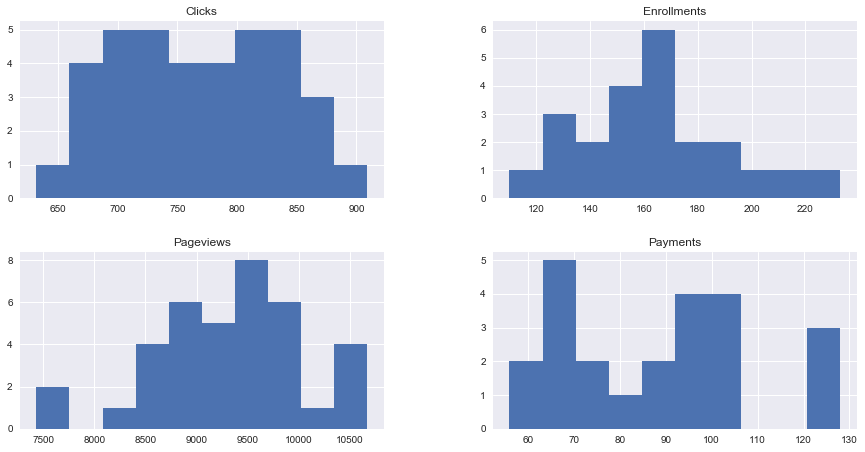

In [8]:
dfCont.hist(figsize=(15,7.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0AB2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3BFA58>]], dtype=object)

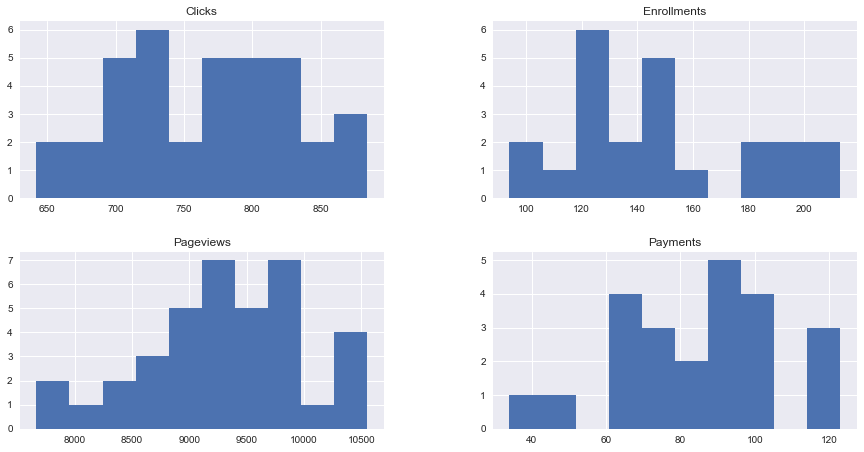

In [9]:
dfExp.hist(figsize=(15,7.5))

In [26]:
# Sanity Checks

# Cookies
Nexp = float(dfExp.Pageviews.sum())
Ncont = float(dfCont.Pageviews.sum())

p = .5   # 50% probability
z = 1.96 # for 95% confidence interval

SD = np.sqrt(p**2/(Nexp + Ncont))
m = SD*z

print("Cookies:")
print("----------------------------------")
print("Standard Deviation:  {:.5f}".format(SD))
print("Margin of error:     {:.5f}".format(m))
print("Confidence Interval: {:.5f} - {:.5f}".format(p-m, p+m))
print("Observed value:      {:.5f}".format(Ncont/(Nexp+Ncont)))



Cookies:
----------------------------------
Standard Deviation:  0.00060
Margin of error:     0.00118
Confidence Interval: 0.49882 - 0.50118
Observed value:      0.50064


In [27]:
 # Clicks
Nexp = float(dfExp.Clicks.sum())
Ncont = float(dfCont.Clicks.sum())

SD = np.sqrt(p**2/(Nexp + Ncont))
m = SD*z

print("Clicks:")
print("----------------------------------")
print("Standard Deviation:  {:.5f}".format(SD))
print("Margin of error:     {:.5f}".format(m))
print("Confidence Interval: {:.5f} - {:.5f}".format(p-m, p+m))
print("Observed value:      {:.5f}".format(Ncont/(Nexp+Ncont)))

print Nexp, Ncont

Clicks:
----------------------------------
Standard Deviation:  0.00210
Margin of error:     0.00412
Confidence Interval: 0.49588 - 0.50412
Observed value:      0.50047
28325.0 28378.0


In [12]:
# Click-through-probability

dfExp['CTR'] = dfExp.Clicks / dfExp.Pageviews
dfCont['CTR'] = dfCont.Clicks / dfCont.Pageviews

CTRcont = dfCont.CTR.mean()
CTRexp = dfExp.CTR.mean()

SDcont = np.sqrt(CTRcont*(1-CTRcont)/dfCont.Pageviews.sum())
m = SDcont*z

print("Click-through-rate:")
print("----------------------------------")
print("CTR control group:    {:.5f}".format(CTRcont))
print("Standard Deviation:   {:.5f}".format(SDcont))
print("Margin of error:      {:.5f}".format(m))
print("Confidence Interval:  {:.5f} - {:.5f}".format(CTRcont-m, CTRcont+m))
print("CTR experiment group: {:.5f}".format(CTRexp))

Click-through-rate:
----------------------------------
CTR control group:    0.08213
Standard Deviation:   0.00047
Margin of error:      0.00092
Confidence Interval:  0.08121 - 0.08304
CTR experiment group: 0.08219


In [13]:
# Effect size tests

NCont = float(dfCont.loc[~dfCont.Enrollments.isnull(), 'Clicks'].sum())
NExp = float(dfExp.loc[~dfExp.Enrollments.isnull(), 'Clicks'].sum())

# Gross conversion
GCcont = dfCont.Enrollments.sum() / NCont
GCexp = dfExp.Enrollments.sum() / NExp

dhat_GC = GCexp - GCcont

z=1.96

ppool = (dfCont.Enrollments.sum() + dfExp.Enrollments.sum()) / (NCont + NExp)
SD = np.sqrt(ppool*(1-ppool)*(1./NCont + 1./NExp))
m = z*SD

print("Gross conversion (control):    {:.5f}".format(GCcont))
print("Gross conversion (experiment): {:.5f}".format(GCexp))
print("dhat:                          {:.5f}".format(dhat_GC))
print("ppool:                         {:.5f}".format(ppool))
print("Pooled Standard Deviation:     {:.5f}".format(SD))
print("Margin of Error:               {:.5f}".format(m))
print("Confidence Interval:           {:.5f} - {:.5f}".format(dhat_GC-m, dhat_GC+m))

Gross conversion (control):    0.21887
Gross conversion (experiment): 0.19832
dhat:                          -0.02055
ppool:                         0.20861
Pooled Standard Deviation:     0.00437
Margin of Error:               0.00857
Confidence Interval:           -0.02912 - -0.01199


In [14]:
# Net Conversion
NCcont = dfCont.Payments.sum() / NCont
NCexp = dfExp.Payments.sum() / NExp

dhat_NC = NCexp - NCcont

ppool = (dfCont.Payments.sum() + dfExp.Payments.sum()) / (NCont + NExp)
SD = np.sqrt(ppool*(1-ppool)*(1./NCont + 1./NExp))
m = z*SD

print("Net conversion (control):      {:.5f}".format(NCcont))
print("Net conversion (experiment):   {:.5f}".format(NCexp))
print("dhat:                          {:.5f}".format(dhat_NC))
print("ppool:                         {:.5f}".format(ppool))
print("Pooled Standard Deviation:     {:.5f}".format(SD))
print("Margin of Error:               {:.5f}".format(m))
print("Confidence Interval:           {:.5f} - {:.5f}".format(dhat_NC-m, dhat_NC+m))


Net conversion (control):      0.11756
Net conversion (experiment):   0.11269
dhat:                          -0.00487
ppool:                         0.11513
Pooled Standard Deviation:     0.00343
Margin of Error:               0.00673
Confidence Interval:           -0.01160 - 0.00186


In [15]:
# Sign Test

GC = dfCont.Enrollments / dfCont.Clicks - dfExp.Enrollments / dfExp.Clicks
NC = dfCont.Payments / dfCont.Clicks - dfExp.Payments / dfExp.Clicks

GCneg = len(GC[GC < 0])
NCneg = len(NC[NC < 0])
GClen = sum(~GC.isnull())
NClen = sum(~NC.isnull())

print("Gross Conversion: Total days: {:.0f}, Days with negative change: {:.0f}".format(GClen, GCneg))
print("Net Conversion:   Total days: {:.0f}, Days with negative change: {:.0f}".format(NClen, NCneg))


Gross Conversion: Total days: 23, Days with negative change: 4
Net Conversion:   Total days: 23, Days with negative change: 10


http://graphpad.com/quickcalcs/binomial1.cfm is used to compute probabilities:

Two-tail p-values:
* Gross Conversion: p = 0.0026 < alpha = .05
* Net Conversion: p = 0.6776 > alpha = .05